# The Impact of Location and Property Characteristics on House Sale Prices : An Inferential Analysis

## 1. Business Understanding

### (a) Introduction

Real Estate is property consisting of land and the buildings on it, along with its natural resourses.The history of real estate can be tracked back to ancient times, when land was acquired by conquest, purchase or inheritance. In the United States, real estate brokers began presenting houses for sale around 1900. By 1908, the National Association of Real Estate Exchanges was founded to bring brokers and agents together to facilitate selling of homes.

Real Estate agencies are business organizations that generally represent either the buyer or the seller in terms of home transactions, and work as a collective group of lincensed agents and/or brokers who operate a given geographical area. Real Estate agents are hired to market and sell properties on behalf of home sellers. They vet potential buyers, lead viewings, and help negotiate final selling price. They usually work to a base annual salary and may earn commision for house sales.

Agents who work for the seller, also known as listing agents, advise clients on how to price the property and prepare for a sale, including providing tips on last-minute improvements that can help boost the price or encourage speedy offers. Seller agents market the property through listing services, networking and advertisements. On the other hand, agents who work for the buyers search for available properties that match the buyer's price range and wish list.These agents often look at past sales data on comparable properties to help prospective buyers come up with a fair bid. 

Generally , real estate agencies act as intermidiaries between property buyers, sellers, landlords and tenants. They represent their clients' interests and work to achieve their goals in real estate transactions. This representation may involve marketing properties, identifying potential buyers or tenants, negotiating deals and handling paperwork.

This project aims to use linear regression to analyze the relationship between the location, the house characteristics and its sale price by developing a model that takes into account intrinsic characteristics of a property such as number of bedrooms , number of bathrooms , square footage of living space , level of craftmanship used to build the house, square footage of the lot and extrinsic factors such as the location of the property. By analyzing this factors, the model will be able to provide guidance to Azizi Realtors real estate agency when it comes to advising their clientel on property valuations. This approach offers a more scientific approach to real estate valuations compared to the traditional approaches that can lean towards the qualitative side. This analysis will provide valuable insights to the clientel of Azizi Realtors real estate agency helping them make informed decisions which in turn will benefit the agency by providing valuable service to their clients.




### (b) Problem Statement

Azizi Realtors want to provide effective advice to their clientel on how the location and house characteristics may increase the estimated value of a house. For the agency to do this effectively, they need a deep understanding on the factors that influence property values. Our goal is to develop a linear regression model that uses data on past properties to accurately capture the relationship between a house's location, characteristics and sale price. This model can provide valuable insights for the analysis, allowing us to estimate how sale price changes as the independent variables change. By providing Azizi Realtors with this information, they can effectively advice their clients when it comes to buying, selling and investing in properties. By doing so we aim to increase the business value of the agency enabling them provide accurate and informed advice to their clientel , leading to increased customer flow, satisfaction and loyalty.

### (c) Defining a metric for success

The model will be demeaned successfull if it can provide an acuurate picture of how the dependent variable price is impacted by the independent variables.

### (d) The Main Objective

To develop a multiple linear regression model that can establish a relationship between a house's location and characteristics and their impact on the house prices

### (e) Specific Objectives

- Testing the assumptions of multiple linear regression
- Analyzing data to identify the most important factors that affect house prices
- Building a linear regression model that evaluates a house's price and how it is impacted by location and house characteristics.
- Evaluating the models statistical significance , MSE and coefficients to come up with interpretable results

### (f) Recording the Experimental Design

- **Reading and checking data** 
This stage involves examining the data and making sense of the column names and their various meaning.

- **Data Wrangling** 
This stage involves handling missing and place holder values, removing outliers and handling categorical data to be able to use it in the model.

- **Modelling**
This stage involves fitting a linear regression model with the sale price as a dependent variable and examining how it changes as the independent variables change.

- **Regresssion Results**
This stage involves interpretating the model's coefficients, the R-squared and the MSE to come up with meaningful insights

- **Conclusions and Recommendations**
This stage involves using the results of the analysis to come up with insights and recommendations for Azizi Realtors inorder for them to provide effective advice to their clientel.

### (g) Data Relevance

This analysis will use data from King County housing dataset. The dataset has 21598 rows and 21 columns.This dataset includes information such as the number of bedrooms and bathrooms, the square footage of the house and the its location.By using this data I can develop a multiple linear regression model that can establish a relationship between a house's location and characteristics and their impact on the house prices. By using this data, we can gain insights on how these factors affect the house prices in King County, Washington. This can help the Azizi Realtors make future predictions on house prices and therefore effectively advice their clients.

## 2. Reading and Checking Data

In [1]:
# importing the necessary libraries

import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler






In [2]:
# reading into the data

housing_df = pd.read_csv("data/kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# checking the last rows of the dataset

housing_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
#checking the info of the data

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 3. Data Wrangling

In [5]:
housing_df = housing_df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","grade","waterfront","view","floors"]]
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,waterfront,view,floors
0,221900.0,3,1.00,1180,5650,7 Average,NaN,NONE,1.0
1,538000.0,3,2.25,2570,7242,7 Average,NO,NONE,2.0
2,180000.0,2,1.00,770,10000,6 Low Average,NO,NONE,1.0
3,604000.0,4,3.00,1960,5000,7 Average,NO,NONE,1.0
4,510000.0,3,2.00,1680,8080,8 Good,NO,NONE,1.0


The dataset has been constricted to only the columns that are going to be used in a model to make it easier to focus on these columns which may improve the quality of the analysis.

#### (i) Identifying and handling missing data

In [6]:
# checking for missing values in the dataset

housing_df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
grade             0
waterfront     2376
view             63
floors            0
dtype: int64

In [7]:
# checking the unique values in waterfront column

housing_df["waterfront"].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [8]:
# filling the missing values in the waterfront column

housing_df["waterfront"] = housing_df["waterfront"].fillna("NO")

All the missing values in the waterfront column have been filled with "NO" under the assumption that all the house that had a null value in the waterfront column were not on a waterfront. We do this to preserve the information contained in the remaining data and avoid losing valuable information by dropping the rows with missing values.This helps reduce bias in the model hence a more accurate and robust model.

In [9]:
# checking for unique values in the view column

housing_df["view"].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [10]:
# filling the missing values in the view column with NONE

housing_df["view"] = housing_df["view"].fillna("NONE")

All the missing values in the view column have been filled with NONE. This is to avoid losing valuable information by dropping the rows where the value in the view column is null.By doing this we preserve all the information in our data for a more accurate model.

In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   grade        21597 non-null  object 
 6   waterfront   21597 non-null  object 
 7   view         21597 non-null  object 
 8   floors       21597 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.5+ MB


#### (ii) Checking and removing outliers

In [12]:
# checking for skewness in the price column

print(housing_df['price'].skew())

4.023364652271239


In [13]:
# defining the mean and standard deviation

price_std = housing_df.price.std()
price_mean = housing_df.price.mean()
housing_df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [14]:
# Removing outliers outside of 3 STDs of Price
new_housing_df = housing_df.copy() 
index = new_housing_df[(new_housing_df['price'] >= 
                            price_mean+3*price_std)].index
new_housing_df.drop(index, inplace = True)
new_housing_df['price'].describe()

count    2.119100e+04
mean     5.070103e+05
std      2.594622e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.470000e+05
75%      6.276500e+05
max      1.640000e+06
Name: price, dtype: float64

In [15]:
# rechecking skewness

print(new_housing_df['price'].skew())

1.3892777400843523


After removing the outliers in the price column, the data is less skewed to the right.

In [16]:
# checking for skewness in the sqft lot column

print(new_housing_df["sqft_lot"].skew())

13.201280275411648


In [17]:
# defining the sqft_lot mean and std

lot_std = housing_df.sqft_lot.std()
lot_mean = housing_df.sqft_lot.mean()


In [18]:
#Removing outliers outside of 3 STDs of sqft_lot
new_housing_df = new_housing_df.copy() 
index = new_housing_df[(new_housing_df['sqft_lot'] >= 
                            lot_mean+3*lot_std)].index
new_housing_df.drop(index, inplace = True)
new_housing_df['sqft_lot'].describe()

count     20859.000000
mean      10790.165348
std       13698.637887
min         520.000000
25%        5000.000000
50%        7500.000000
75%       10250.000000
max      138085.000000
Name: sqft_lot, dtype: float64

In [19]:
# rechecking for skewness

print(new_housing_df["sqft_lot"].skew())

4.592086305629322


After removing the outliers in the sqft_lot column the data seems to be significantly less skewed to the right

In [20]:
print(new_housing_df["floors"].skew())
print(new_housing_df["sqft_living"].skew())
print(new_housing_df["bathrooms"].skew())
print(new_housing_df["bedrooms"].skew())




0.647863747472886
0.9611549791782756
0.29666897432345163
2.107282070161595


The outliers from the two most skewed columns have been removed since outliers can cause various effects on statistical models, such as reducing the power and validity of statistical tests, causing bias and influence in estimates and regression models, and providing insights and revealing errors in data analysis

## 4. Modelling

### (i) The baseline Model

In [21]:
# checking for column correlation with the price

columns = new_housing_df[["price" ,"bathrooms" , "bedrooms" , "floors" , "sqft_lot" , "sqft_living"]]

columns.corr()["price"]



price          1.000000
bathrooms      0.489574
bedrooms       0.310548
floors         0.275310
sqft_lot       0.117963
sqft_living    0.661065
Name: price, dtype: float64

In [22]:
# buiding a baseline model with the sqft_living and price

y = new_housing_df["price"]
X = new_housing_df[["sqft_living"]]
baseline_model = sm.OLS(y , sm.add_constant(X))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 1.619e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:44:31   Log-Likelihood:            -2.8360e+05
No. Observations:               20859   AIC:                         5.672e+05
Df Residuals:                   20857   BIC:                         5.672e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.581e+04   3559.220     24.110      0.000    7.88e+04    9.28e+04
sqft_living   207.4671      1.631    127.238      0.000     204.271     210.663
==============================================================================
Omnibus:                     3491.840   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7543.832
Skew:                           0.988   Prob(JB):                         0.00
Kurtosis:                       5.185   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is statistically significant with the probability F-statistic being lower than the significance level of 0.05 explaining about 44% of the variance in price. Both of the coefficients are also statistically significant.
The model formula is:
y = 85810 + 207.4671X.
This means that when the square footage of living space in a home is zero the price of the home is estimated to be around 85810 dollars and for each unit increase in square footage the price of the house increases by about 208 dollars.

### (ii) The second model

In [23]:
# creating dummies for categorical data

categorical_data = new_housing_df[["view" , "waterfront" , "grade"]]

categorical_data_ohe = pd.get_dummies(categorical_data, drop_first = True , dtype=int)

categorical_data_ohe




,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [24]:
# joining the two dataframes

df = pd.concat([columns ,categorical_data_ohe], axis = 1)
df.head()

,price,bathrooms,bedrooms,floors,sqft_lot,sqft_living,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,1.00,3,1.0,5650,1180,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,538000.0,2.25,3,2.0,7242,2570,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,180000.0,1.00,2,1.0,10000,770,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,604000.0,3.00,4,1.0,5000,1960,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,510000.0,2.00,3,1.0,8080,1680,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
# defining the predictors and the target variables

X_all = df.drop("price" , axis = 1)
y = df["price"]

# building and fitting the model

model2 = sm.OLS(y , sm.add_constant(X_all)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1363.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:44:32   Log-Likelihood:            -2.8117e+05
No. Observations:               20859   AIC:                         5.624e+05
Df Residuals:                   20839   BIC:                         5.625e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.032e+05    1.2e+04     58.375      0.000     6.8e+05    7.27e+05
bathrooms            -1.15e+04   2716.653     -4.234      0.000   -1.68e+04   -6177.392
bedrooms            -6524.1777   1699.094     -3.840      0.000   -9854.535   -3193.820
floors              -1.119e+04   2747.280     -4.071      0.000   -1.66e+04   -5800.309
sqft_lot               -1.1000      0.093    -11.867      0.000      -1.282      -0.918
sqft_living           118.0746      2.931     40.290      0.000     112.330     123.819
view_EXCELLENT       1.401e+05   1.48e+04      9.471      0.000    1.11e+05    1.69e+05
view_FAIR            2.803e+04   1.15e+04      2.432      0.015    5443.451    5.06e+04
view_GOOD            4.935e+04   1.03e+04      4.815      0.000    2.93e+04    6.94e+04
view_NONE           -1.018e+05   6066.720    -16.772      0.000   -1.14e+05   -8.99e+04
waterfront_YES        1.67e+05   2.27e+04      7.370      0.000    1.23e+05    2.11e+05
grade_11 Excellent   1.137e+05   1.21e+04      9.409      0.000       9e+04    1.37e+05
grade_12 Luxury      2.584e+05   3.22e+04      8.013      0.000    1.95e+05    3.22e+05
grade_3 Poor        -3.603e+05   1.73e+05     -2.080      0.038      -7e+05   -2.08e+04
grade_4 Low         -4.336e+05   3.44e+04    -12.621      0.000   -5.01e+05   -3.66e+05
grade_5 Fair         -4.28e+05   1.39e+04    -30.867      0.000   -4.55e+05   -4.01e+05
grade_6 Low Average -3.919e+05   8689.176    -45.098      0.000   -4.09e+05   -3.75e+05
grade_7 Average     -3.379e+05   7299.318    -46.296      0.000   -3.52e+05   -3.24e+05
grade_8 Good        -2.548e+05   6734.554    -37.832      0.000   -2.68e+05   -2.42e+05
grade_9 Better      -1.243e+05   6754.265    -18.397      0.000   -1.37e+05   -1.11e+05
==============================================================================
Omnibus:                     3340.431   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7961.507
Skew:                           0.915   Prob(JB):                         0.00
Kurtosis:                       5.410   Cond. No.                     2.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model explains about 55% of the variance in price hence does a better job than the first model.The model is statistically significant as its probability F-statistic is less than the significance level of 0.05. All the coefficient in this model are statistically significant.
- When all the other independent variables are 0 , the price of a house is estimated to be 703,200 dollars.
-  The coefficient for bathrooms is -1.15e+04, which means that for each additional bathroom, the price is expected to decrease by 11,500 dollars on average, holding all other variables constant.
- The coefficient for bedrooms is -6524.1777, which means that for each additional bedroom, the price is expected to decrease by 6,524 dollars on average, holding all other variables constant.
- The coefficient for floors is -1.119e+04, which means that for each additional floor, the price is expected to decrease by 11,190 dollars on average, holding all other variables constant.
- The coefficient for sqft_lot is -1.1000, which means that for each additional square foot of lot size, the price is expected to decrease by 1.10 dollars on average, holding all other variables constant.
- The coefficient for sqft_living is 118.0746, which means that for each additional square foot of living area, the price is expected to increase by 118.07 dollars on average, holding all other variables constant.
- The coefficient for view_EXCELLENT is 1.401e+05, which means that a house with an excellent view is expected to have a price that is 140,100 dollars higher on average than a house with an average view (the reference category), holding all other variables constant.
- The coefficient for view_FAIR is 2.803e+04, which means that a house with a fair view is expected to have a price that is 28,030 dollars higher on average than a house with an average view , holding all other variables constant.
- The coefficient for view_GOOD is 4.935e+04, which means that a house with a good view is expected to have a price that is 49,350 dollars higher on average than a house with an average view , holding all other variables constant.
- The coefficient for view_NONE is -1.018e+05, which means that a house with no view is expected to have a price that is 101,800 dollars lower on average than a house with an average view, holding all other variables constant.
- The coefficient for waterfront_YES is 1.67e+05, which means that a house with waterfront access is expected to have a price that is 167,000 dollars higher on average than a house without waterfront access (the reference category), holding all other variables constant.
-  The coefficient for grade_11 Excellent is 1.137e+05, which means that a house with an excellent grade (11) is expected to have a price that is 113,700 dollars higher on average than a house with a very good grade (10) (the reference category), holding all other variables constant.
- The coefficient for grade_12 Luxury is 2.584e+05, which means that a house with a luxury grade (12) is expected to have a price that is 258,400 dollars  higher on average than a house with a very good grade (10), holding all other variables constant.
- The coefficient for grade_3 Poor is -3.603e+05, which means that a house with a poor grade (3) is expected to have a price that is 360,300 dollars lower on average than a house with a very good grade (10), holding all other variables constant.
- The coefficient for grade_4 Low is -4.336e+05, which means that a house with a low grade (4) is expected to have a price that is 433,600 dollars lower on average than a house with a very good grade (10), holding all other variables constant.
- The coefficient for grade_5 Fair is -4.28e+05, which means that a house with a fair grade (5) is expected to have a price that is 428,000 dollars lower on average than a house with a very good grade (10) , holding all other variables constant.
- The coefficient for grade_6 Low Average is -3.919e+05, which means that a house with a low average grade (6) is expected to have a price that is 391,900 dollars lower on average than a house with a very good grade (10), holding all other variables constant.
- The coefficient for grade_7 Average is -3.379e+05, which means that a house with an average grade (7) is expected to have a price that is 337,900 dollars lower on average than a house with a very good grade (10) , holding all other variables constant.
- The coefficient for grade_8 Good is -2.548e+05, which means that a house with a good grade (8) is expected to have a price that is 254,800 dollars lower on average than a house with a very good grade (10) , holding all other variables constant.
- The coefficient for grade_9 Better is -1.243e+05, which means that a house with a better grade (9) is expected to have a price that is 124,300 dollars lower on average than a house with a very good grade (10) , holding all other variables constant

#### Assumptions of multiple linear regression

##### (a) Multicolinearity

In [26]:
# drop the price column
df = df.drop('price', axis=1)

# calculate the correlation matrix
corr_matrix = df.corr()

# display the correlation matrix
print(corr_matrix)

                     bathrooms  bedrooms    floors  sqft_lot  sqft_living  \
bathrooms             1.000000  0.503331  0.505124  0.085754     0.732301   
bedrooms              0.503331  1.000000  0.165393  0.083631     0.586593   
floors                0.505124  0.165393  1.000000 -0.077463     0.347919   
sqft_lot              0.085754  0.083631 -0.077463  1.000000     0.247016   
sqft_living           0.732301  0.586593  0.347919  0.247016     1.000000   
view_EXCELLENT        0.050133  0.008773  0.007126  0.039517     0.094420   
view_FAIR             0.028710  0.014352 -0.026819  0.002696     0.058199   
view_GOOD             0.090847  0.036197  0.009193  0.034790     0.138188   
view_NONE            -0.131349 -0.057904  0.005013 -0.052130    -0.218062   
waterfront_YES        0.005208 -0.032281  0.000903  0.050137     0.016373   
grade_11 Excellent    0.198704  0.094013  0.100182  0.106682     0.295967   
grade_12 Luxury       0.076897  0.028024  0.026828  0.044856     0.120594   

The bathrooms column is considerably highly positively correlated with the square footage of living column hence to avoid multicolinearity the bathroom column has to be dropped.


In [27]:
# dropping the bathrooms column

df = df.drop("bathrooms" , axis = 1)


##### (b) Linearity

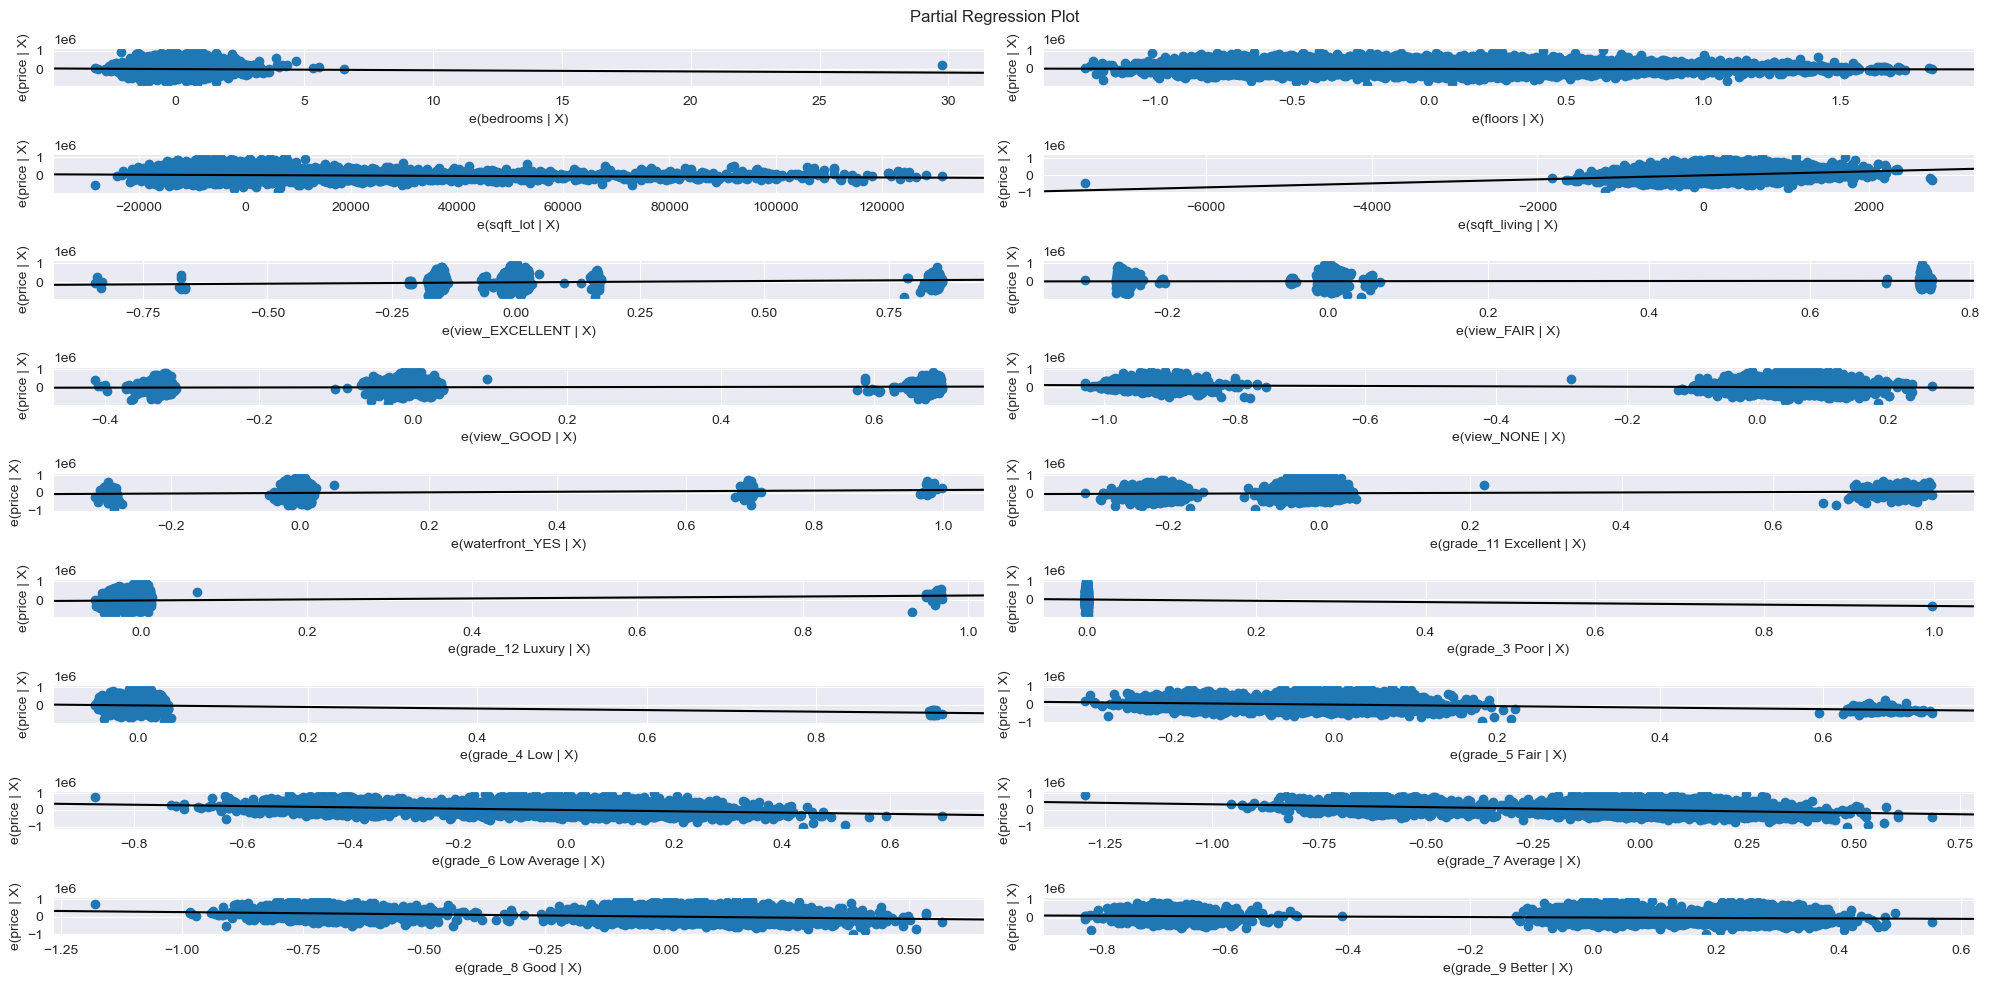

In [28]:
# plotting partial regression for each predictor

fig = plt.figure(figsize = (20,10))
sm.graphics.plot_partregress_grid(model2 , exog_idx =["bedrooms","floors","sqft_lot","sqft_living",	"view_EXCELLENT","view_FAIR","view_GOOD","view_NONE","waterfront_YES",	"grade_11 Excellent","grade_12 Luxury","grade_3 Poor",	"grade_4 Low",	"grade_5 Fair",	"grade_6 Low Average",	"grade_7 Average",	"grade_8 Good",	"grade_9 Better"] , fig=fig)
plt.tight_layout()

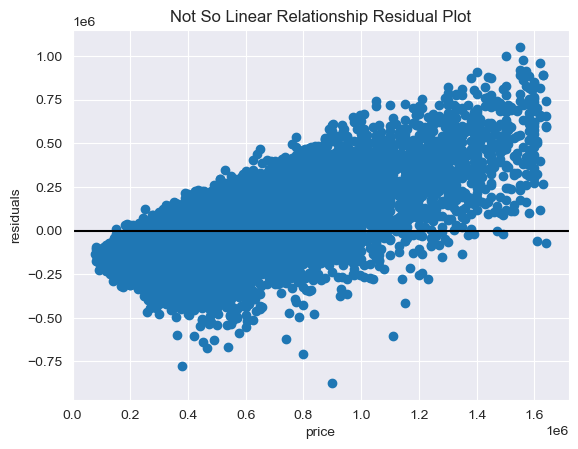

In [29]:
fig, ax = plt.subplots()

ax.scatter(y, model2.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals")
ax.set_title("Not So Linear Relationship Residual Plot");

In [30]:
# log transforming the bedrooms column

X_no_linear = df[["bedrooms"]]

X_bedrooms_log = X_no_linear.copy()

X_bedrooms_log["log(bedrooms)"] = np.log(X_bedrooms_log["bedrooms"])

# Visually inspect raw vs. transformed values
X_bedrooms_log[["bedrooms", "log(bedrooms)"]]

,bedrooms,log(bedrooms)
0,3,1.098612
1,3,1.098612
2,2,0.693147
3,4,1.386294
4,3,1.098612
...,...,...
21592,3,1.098612
21593,4,1.386294
21594,2,0.693147
21595,3,1.098612


In [31]:
# adding log transformation of the bedroom column to the dataset

df = pd.concat([X_bedrooms_log["log(bedrooms)"], df], axis=1)
df.drop("bedrooms", axis = 1 , inplace=True)
df.head()

,log(bedrooms),floors,sqft_lot,sqft_living,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1.098612,1.0,5650,1180,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1.098612,2.0,7242,2570,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.693147,1.0,10000,770,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1.386294,1.0,5000,1960,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.098612,1.0,8080,1680,0,0,0,1,0,0,0,0,0,0,0,0,1,0


The bedrooms column has been log transformed because it did not assume linearity hence by transforming it we make it more linear.

### (iii) The Third model

In [32]:
# building the third model
x = df
model3 = sm.OLS(y , sm.add_constant(x)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1441.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:44:45   Log-Likelihood:            -2.8116e+05
No. Observations:               20859   AIC:                         5.624e+05
Df Residuals:                   20840   BIC:                         5.625e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.093e+05   1.21e+04     58.458      0.000    6.86e+05    7.33e+05
log(bedrooms)       -4.094e+04   5538.047     -7.393      0.000   -5.18e+04   -3.01e+04
floors              -1.507e+04   2594.836     -5.806      0.000   -2.02e+04   -9980.381
sqft_lot               -1.0871      0.092    -11.763      0.000      -1.268      -0.906
sqft_living           116.8919      2.649     44.123      0.000     111.699     122.085
view_EXCELLENT       1.396e+05   1.48e+04      9.441      0.000    1.11e+05    1.69e+05
view_FAIR            2.791e+04   1.15e+04      2.422      0.015    5326.328    5.05e+04
view_GOOD             4.87e+04   1.02e+04      4.753      0.000    2.86e+04    6.88e+04
view_NONE           -1.009e+05   6065.769    -16.631      0.000   -1.13e+05    -8.9e+04
waterfront_YES       1.639e+05   2.27e+04      7.236      0.000     1.2e+05    2.08e+05
grade_11 Excellent   1.112e+05   1.21e+04      9.203      0.000    8.75e+04    1.35e+05
grade_12 Luxury      2.538e+05   3.22e+04      7.876      0.000    1.91e+05    3.17e+05
grade_3 Poor         -3.78e+05   1.73e+05     -2.183      0.029   -7.17e+05   -3.86e+04
grade_4 Low         -4.403e+05   3.44e+04    -12.814      0.000   -5.08e+05   -3.73e+05
grade_5 Fair         -4.26e+05   1.38e+04    -30.860      0.000   -4.53e+05   -3.99e+05
grade_6 Low Average -3.866e+05   8608.877    -44.903      0.000   -4.03e+05    -3.7e+05
grade_7 Average     -3.332e+05   7284.578    -45.746      0.000   -3.48e+05   -3.19e+05
grade_8 Good        -2.525e+05   6728.148    -37.529      0.000   -2.66e+05   -2.39e+05
grade_9 Better      -1.223e+05   6751.921    -18.109      0.000   -1.36e+05   -1.09e+05
==============================================================================
Omnibus:                     3370.698   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8081.484
Skew:                           0.921   Prob(JB):                         0.00
Kurtosis:                       5.431   Cond. No.                     2.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The third model does slightly better than the second model because it explains about 56% of the variance in price.
The model is statistcally significant with all the coefficients also being statistically significant.
The model has one coefficient that is log transformed, the bedrooms column.
- The bedrooms coefficient can be interpretted as on average, a 1% increase in the number of bedrooms is associated with a decrease of 409.4 dollars in the price, holding all other variables constant.

##### (c) Normality

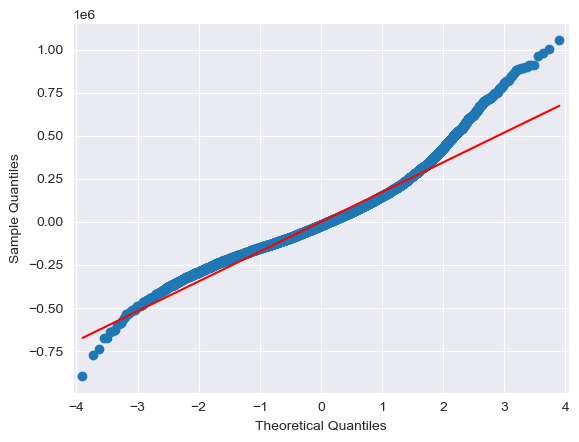

In [33]:
# checking for normality in the model's residuals using a qqplot

residuals = model3.resid
sm.qqplot(residuals, line='s')
plt.show()



The residuals do not appear to follow the normality assumption hence we can combat this issue by log transforming the dependent variable to improve the normality of the residuals. This can also help stabilize the variance of the residuals if it is not constant..

In [34]:
y_new = np.log(y)

### (iv) The forth Model

In [35]:
x2 = df
model4 = sm.OLS(y_new , sm.add_constant(x2)).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1254.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:44:46   Log-Likelihood:                -6813.1
No. Observations:               20859   AIC:                         1.366e+04
Df Residuals:                   20840   BIC:                         1.382e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.2366      0.024    562.075      0.000      13.190      13.283
log(bedrooms)          -0.0803      0.011     -7.470      0.000      -0.101      -0.059
floors                 -0.0105      0.005     -2.080      0.038      -0.020      -0.001
sqft_lot            -1.512e-06   1.79e-07     -8.432      0.000   -1.86e-06   -1.16e-06
sqft_living             0.0002   5.14e-06     42.817      0.000       0.000       0.000
view_EXCELLENT          0.1537      0.029      5.353      0.000       0.097       0.210
view_FAIR               0.0538      0.022      2.406      0.016       0.010       0.098
view_GOOD               0.0322      0.020      1.618      0.106      -0.007       0.071
view_NONE              -0.1749      0.012    -14.855      0.000      -0.198      -0.152
waterfront_YES          0.2636      0.044      5.996      0.000       0.177       0.350
grade_11 Excellent      0.0427      0.023      1.822      0.069      -0.003       0.089
grade_12 Luxury         0.0844      0.063      1.350      0.177      -0.038       0.207
grade_3 Poor           -0.6700      0.336     -1.994      0.046      -1.329      -0.011
grade_4 Low            -1.0082      0.067    -15.119      0.000      -1.139      -0.878
grade_5 Fair           -0.8864      0.027    -33.087      0.000      -0.939      -0.834
grade_6 Low Average    -0.6898      0.017    -41.286      0.000      -0.723      -0.657
grade_7 Average        -0.4884      0.014    -34.547      0.000      -0.516      -0.461
grade_8 Good           -0.3014      0.013    -23.084      0.000      -0.327      -0.276
grade_9 Better         -0.1150      0.013     -8.775      0.000      -0.141      -0.089
==============================================================================
Omnibus:                       20.450   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.780
Skew:                           0.000   Prob(JB):                     0.000138
Kurtosis:                       2.857   Cond. No.                     2.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

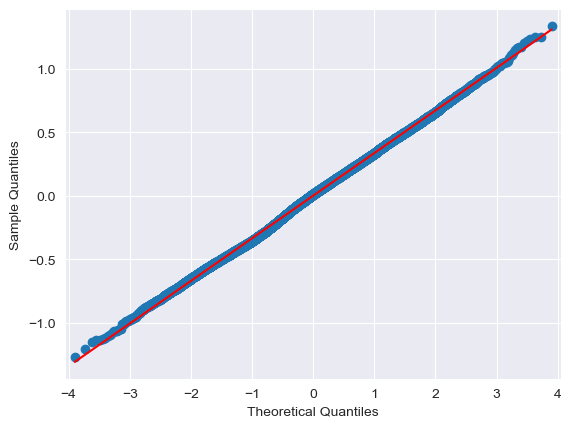

In [36]:
# checking for the normality ot the residuals.
residuals = model4.resid
sm.qqplot(residuals, line='s')
plt.show()


The forth model seems to do worse than the preior models however by transforming the dependent variable, the residuals of the forth model appear to follow the normal distribution. 
The model itself is statistically significant with the p-value being less than 0.05.
All the coefficients are statistically significant except grade_12 Luxury and view_GOOD	.
In this model the dependent variable price has been log transformed.This means that instead of representing the change in the dependent variable for a one-unit change in the corresponding independent variable, the coefficients represent the change in the log of the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant. since log transformation is a non-linear transformation, this means that the change in the dependent variable is not constant, but depends on its initial value.



##### (d) Homoscedastisity

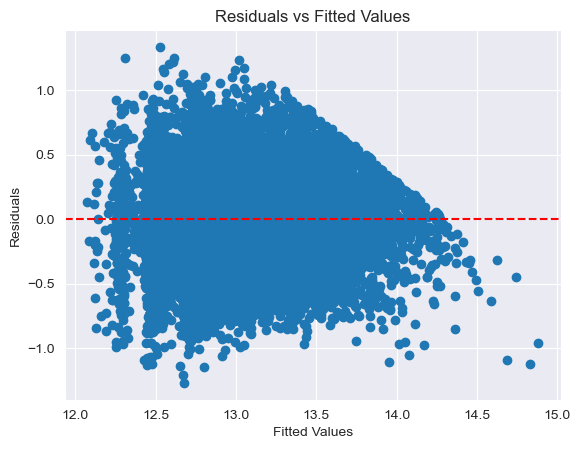

In [37]:
# checking for homoscedastisity

residuals = model4.resid
fitted_values = model4.fittedvalues

# Create a scatter plot of residuals versus fitted values
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Add a horizontal line at zero to help visualize the distribution of residuals
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

In [38]:
#standardizing coefficients for a more interpretable result
# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to standardize
cols_to_standardize = ['floors', 'sqft_lot', 'sqft_living']

# Fit the scaler on the selected columns and transform them
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

In [39]:
print(df[cols_to_standardize].mean())
print(df[cols_to_standardize].std())

floors         1.853086e-16
sqft_lot      -2.180101e-17
sqft_living   -9.810456e-17
dtype: float64
floors         1.000024
sqft_lot       1.000024
sqft_living    1.000024
dtype: float64


We have standardized this three columns for a more interpretable result since technically there can be no houses where the sqft of living is zero.
Hence we interpret the coefficients of model 4 a bit differently.
- The intercept is 13.2366, which means that the expected log-transformed price for a property with average bedrooms, averade floors, average square feet of lot and living space (after standardization) is 13.2366. Since the dependent variable is log-transformed, this translates to an expected price of approximately 561,000 dollars (calculated as exp(13.2366)).
- The coefficient of the log of bedrooms is  -0.0803 meaning that for 1% increase is bedrooms there is an associated decrease of 0.08% in price.
- The coefficient of floors is -0.0105	meaning that for 1 unit increase in a house with an average number of floors there is an associated decrease of 1.05% in price.
- The coefficient of sqft lot is  1.512e-06 meaning that for 1 unit increase in a house with an average number of square feet in the lot there is an associated increase of 0.0001512% in price.
- The coefficient of sqft_living is 0.0002	meaning that for each 1 unit increase in sqft_living in a house with an average number of square feet in living area there is an associated increase of 0.02% in price.

## 5.Modelling Results

The final model's R-squared is 0.52 .this indicates that approximately 52% of the variation in the dependent variable price can be explained by the independent variables in the model. The F-statistic is 1254, with a p-value of 0.00, indicating that the overall model is statistically significant. All the coefficients of te model are statistically significant except view_GOOD and grade_12 Luxury. The dependent variable price has been log transformed to improve the normality of the residuals and hence stabilize the variance of the residuals.

The model has seven idependent variables four being numerical and three being catergorical.One of the numerical coefficients bedrooms has been log transformed to improve the linearity of the variable.The other three sqft_living , sqft_lot and floors have been standardized to help yield a more interpretable intercept.

- The constant is 13.2366 meaning that for a house with an average number sqft_living , sqft_lot and floors and all the other variables being zero, the expected value of the log of the dependent variable is 13.2366. To obtain the expected value of the dependent variable itself, you can take the exponential of the intercept: exp(13.2366) = 559,407.
- The coefficient of sqft_living is 0.0002 meaning that for 1 unit increase in the square footage of living space there is an associated 0.02%  increase in the price of a house.
- The coefficeint of the log of bedrooms is -0.0803 meaning than for each 1% increase in bedrooms there is an associated 0.0803% decrease in the house price.
- The floors coefficient is -0.0105 meaning that for each one unit increase in floors there is an associated 1.05% decrease in the price of the house.
- The waterfront_YES coefficient is 0.2636 meaning that  there is an expected increase of 26.36% in price of house with access to a waterfront as compared to those without access.



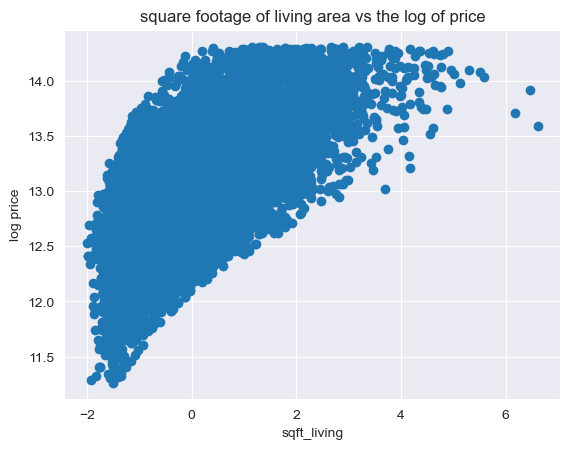

In [93]:
# visualizing the relationship between sqft_living and log of price
plt.scatter(df["sqft_living"] , y_new)
plt.title("square footage of living area vs the log of price")
plt.xlabel("sqft_living")
plt.ylabel("log price");

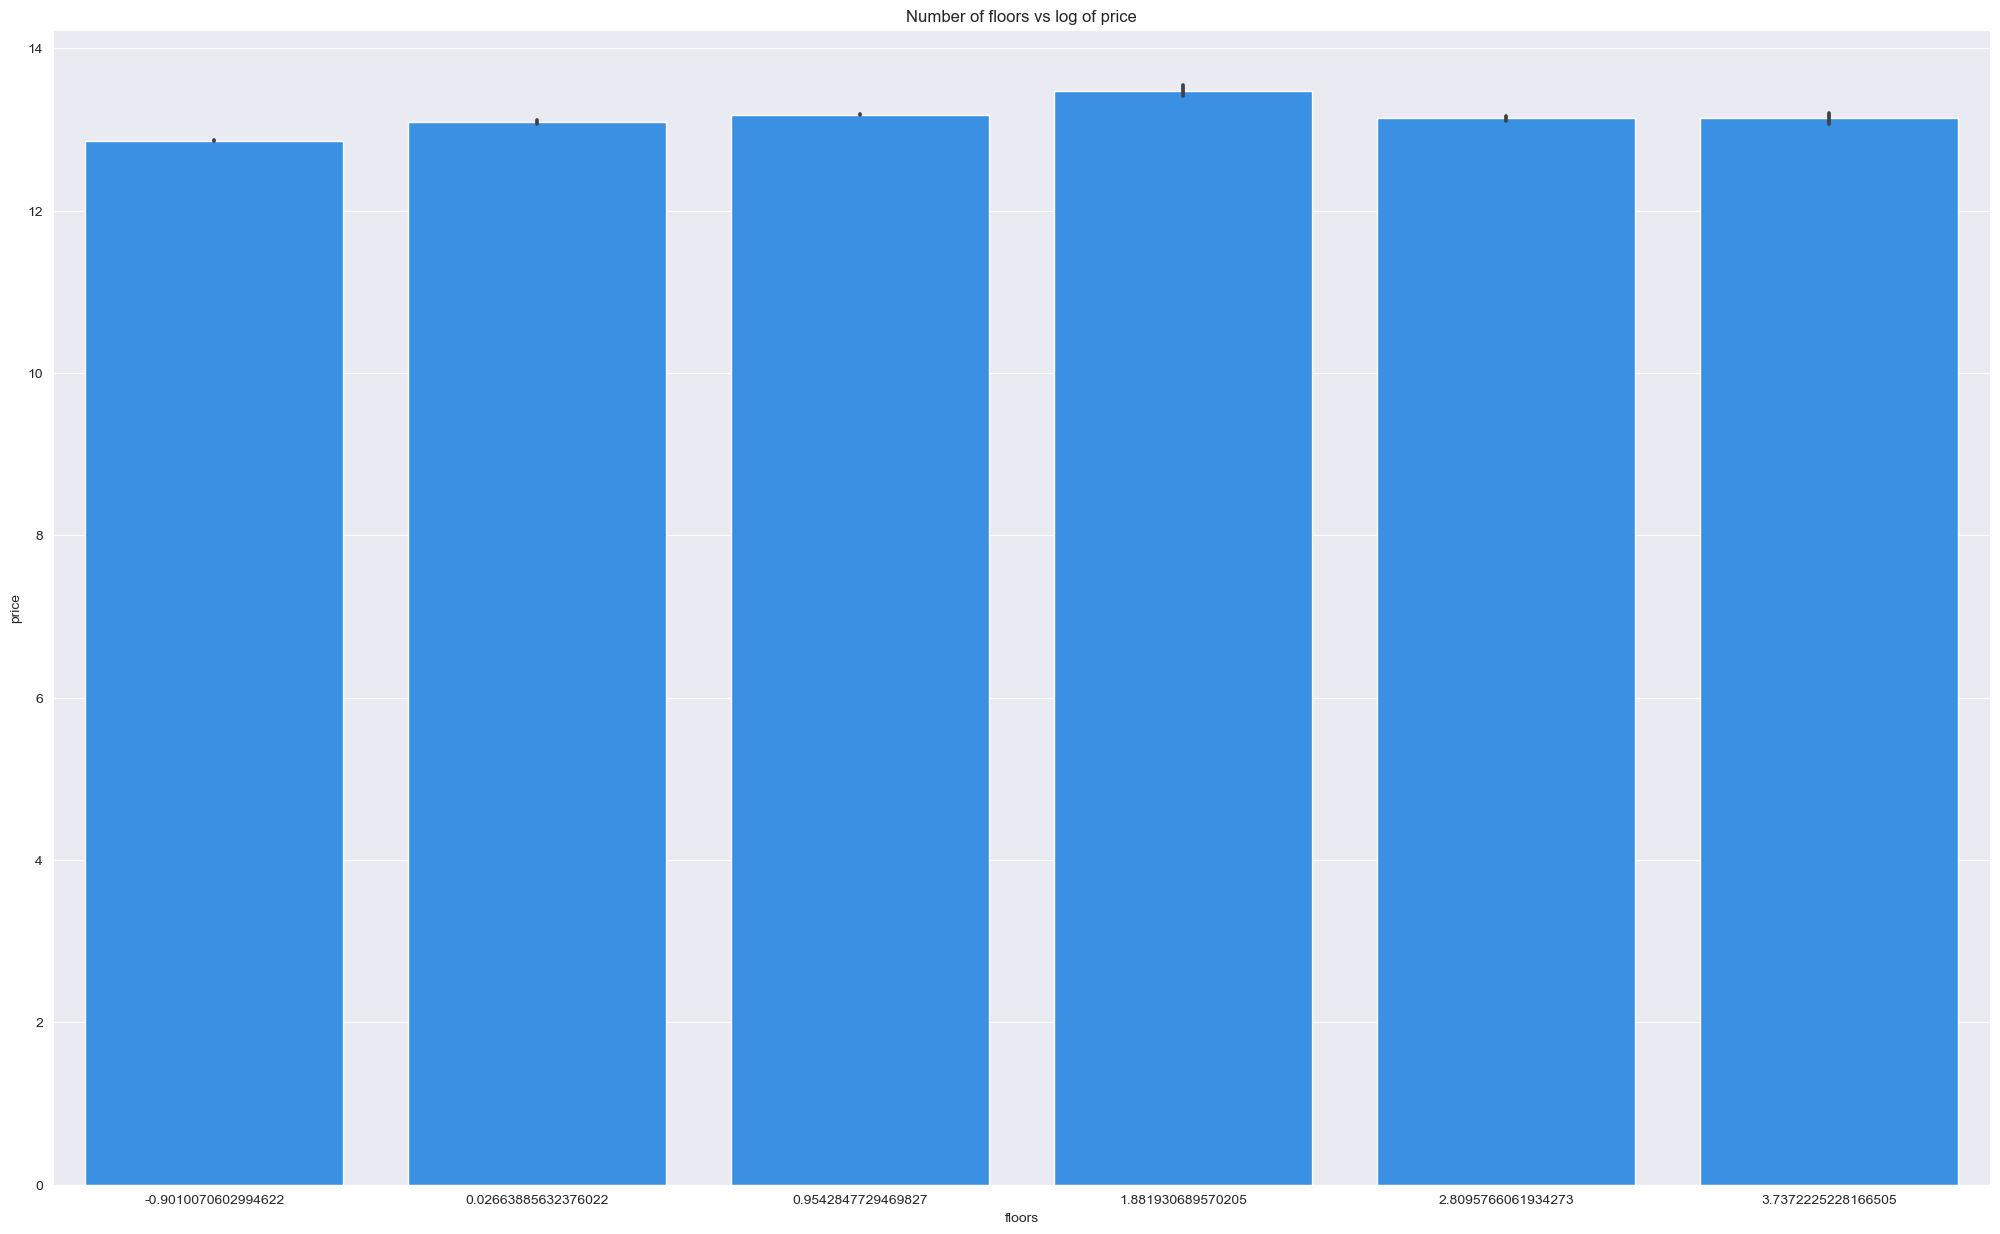

In [87]:
# visualixing the relationship between the floors and the log of price.
plt.figure(figsize=(25, 15))
ax = sns.barplot(x=df["floors"],y=y_new,data=df , color="dodgerblue")
ax.set_title("Number of floors vs log of price");

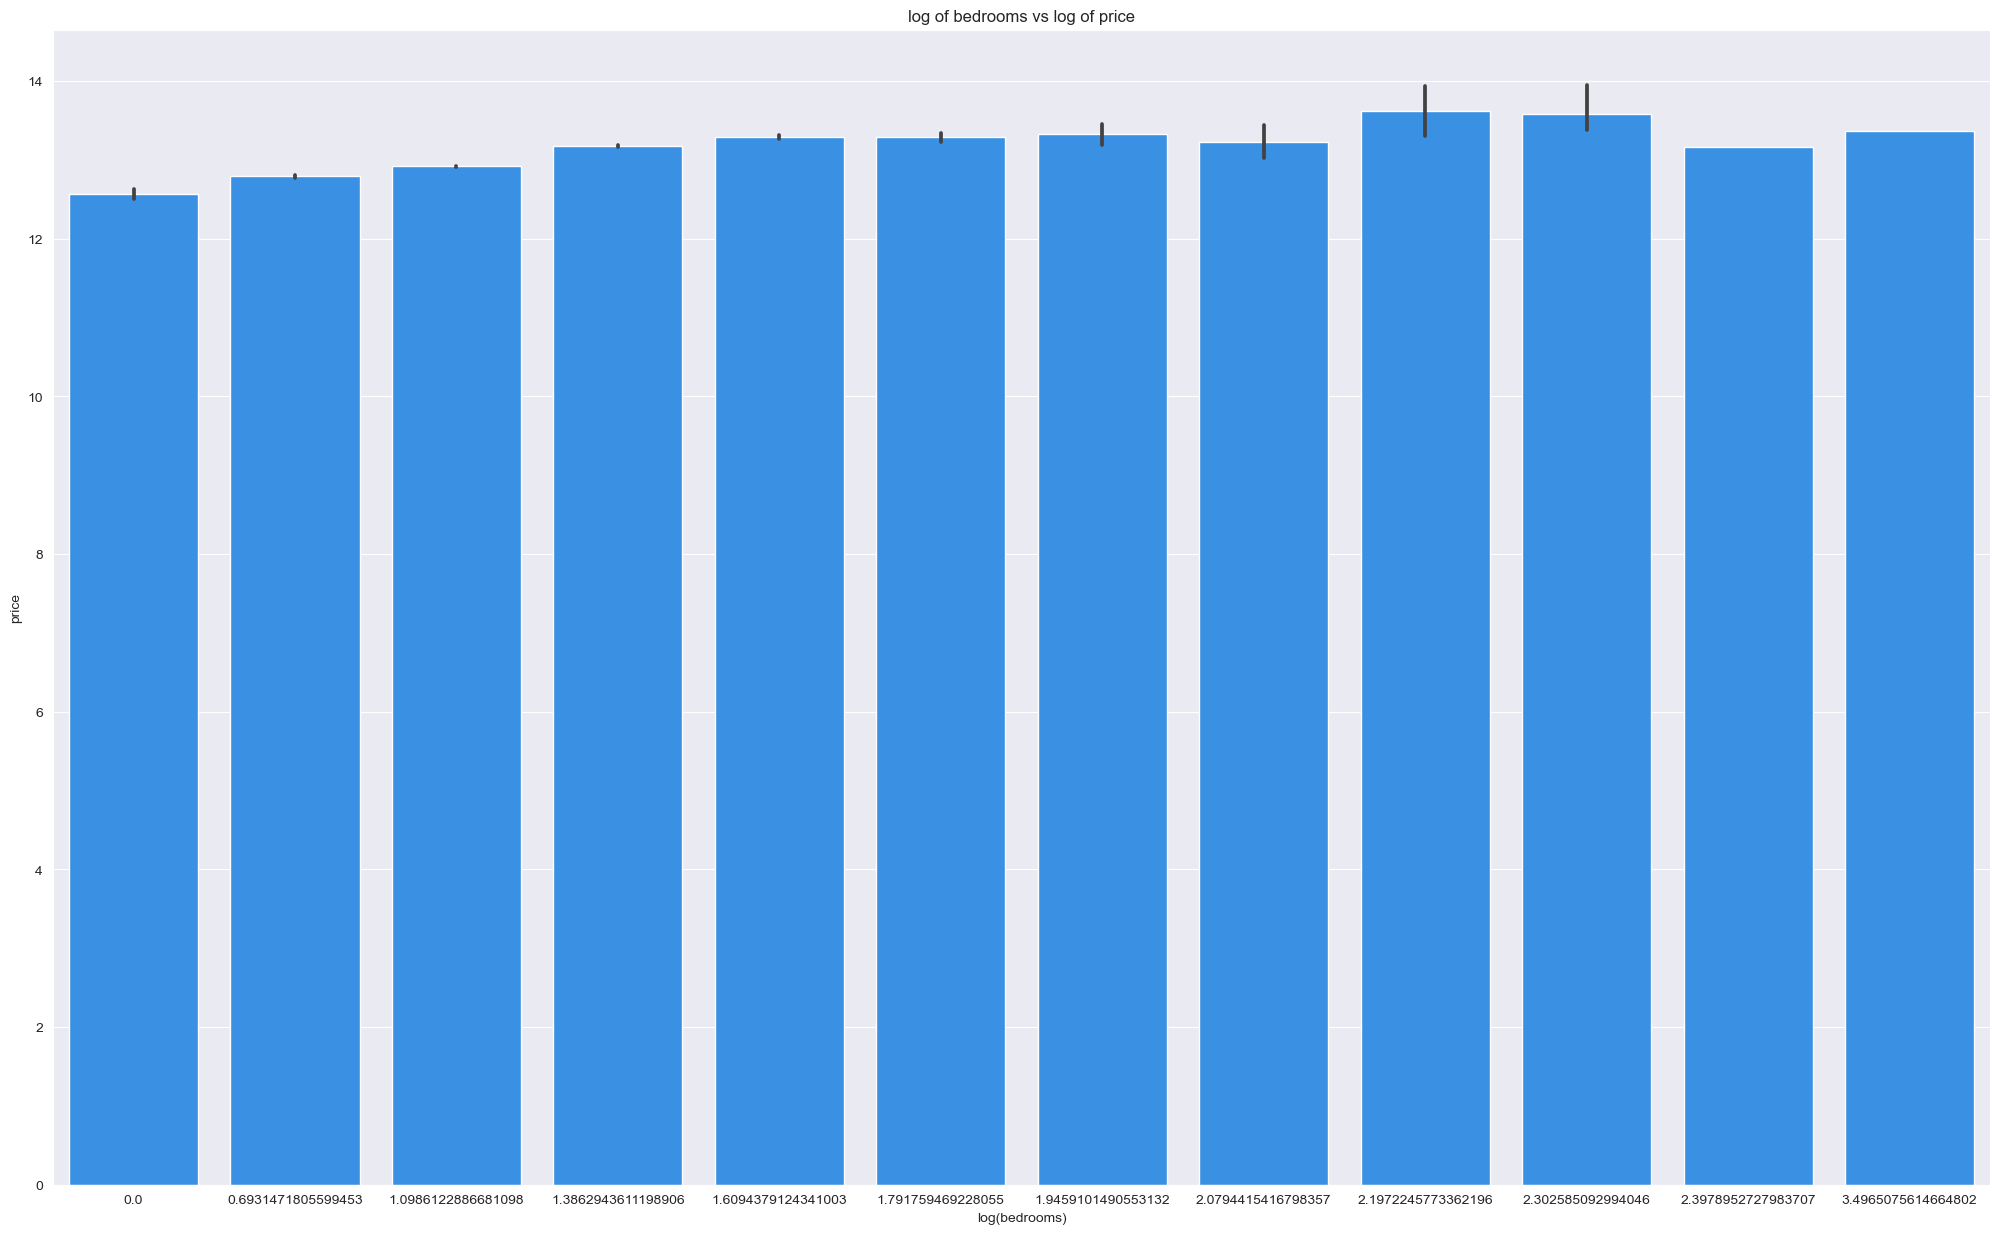

In [86]:
# visualizing the relationship between bedrooms and price.
plt.figure(figsize=(25, 15))
ax = sns.barplot(x=df["log(bedrooms)"],y=y_new,data=df , color="dodgerblue")
ax.set_title("log of bedrooms vs log of price");

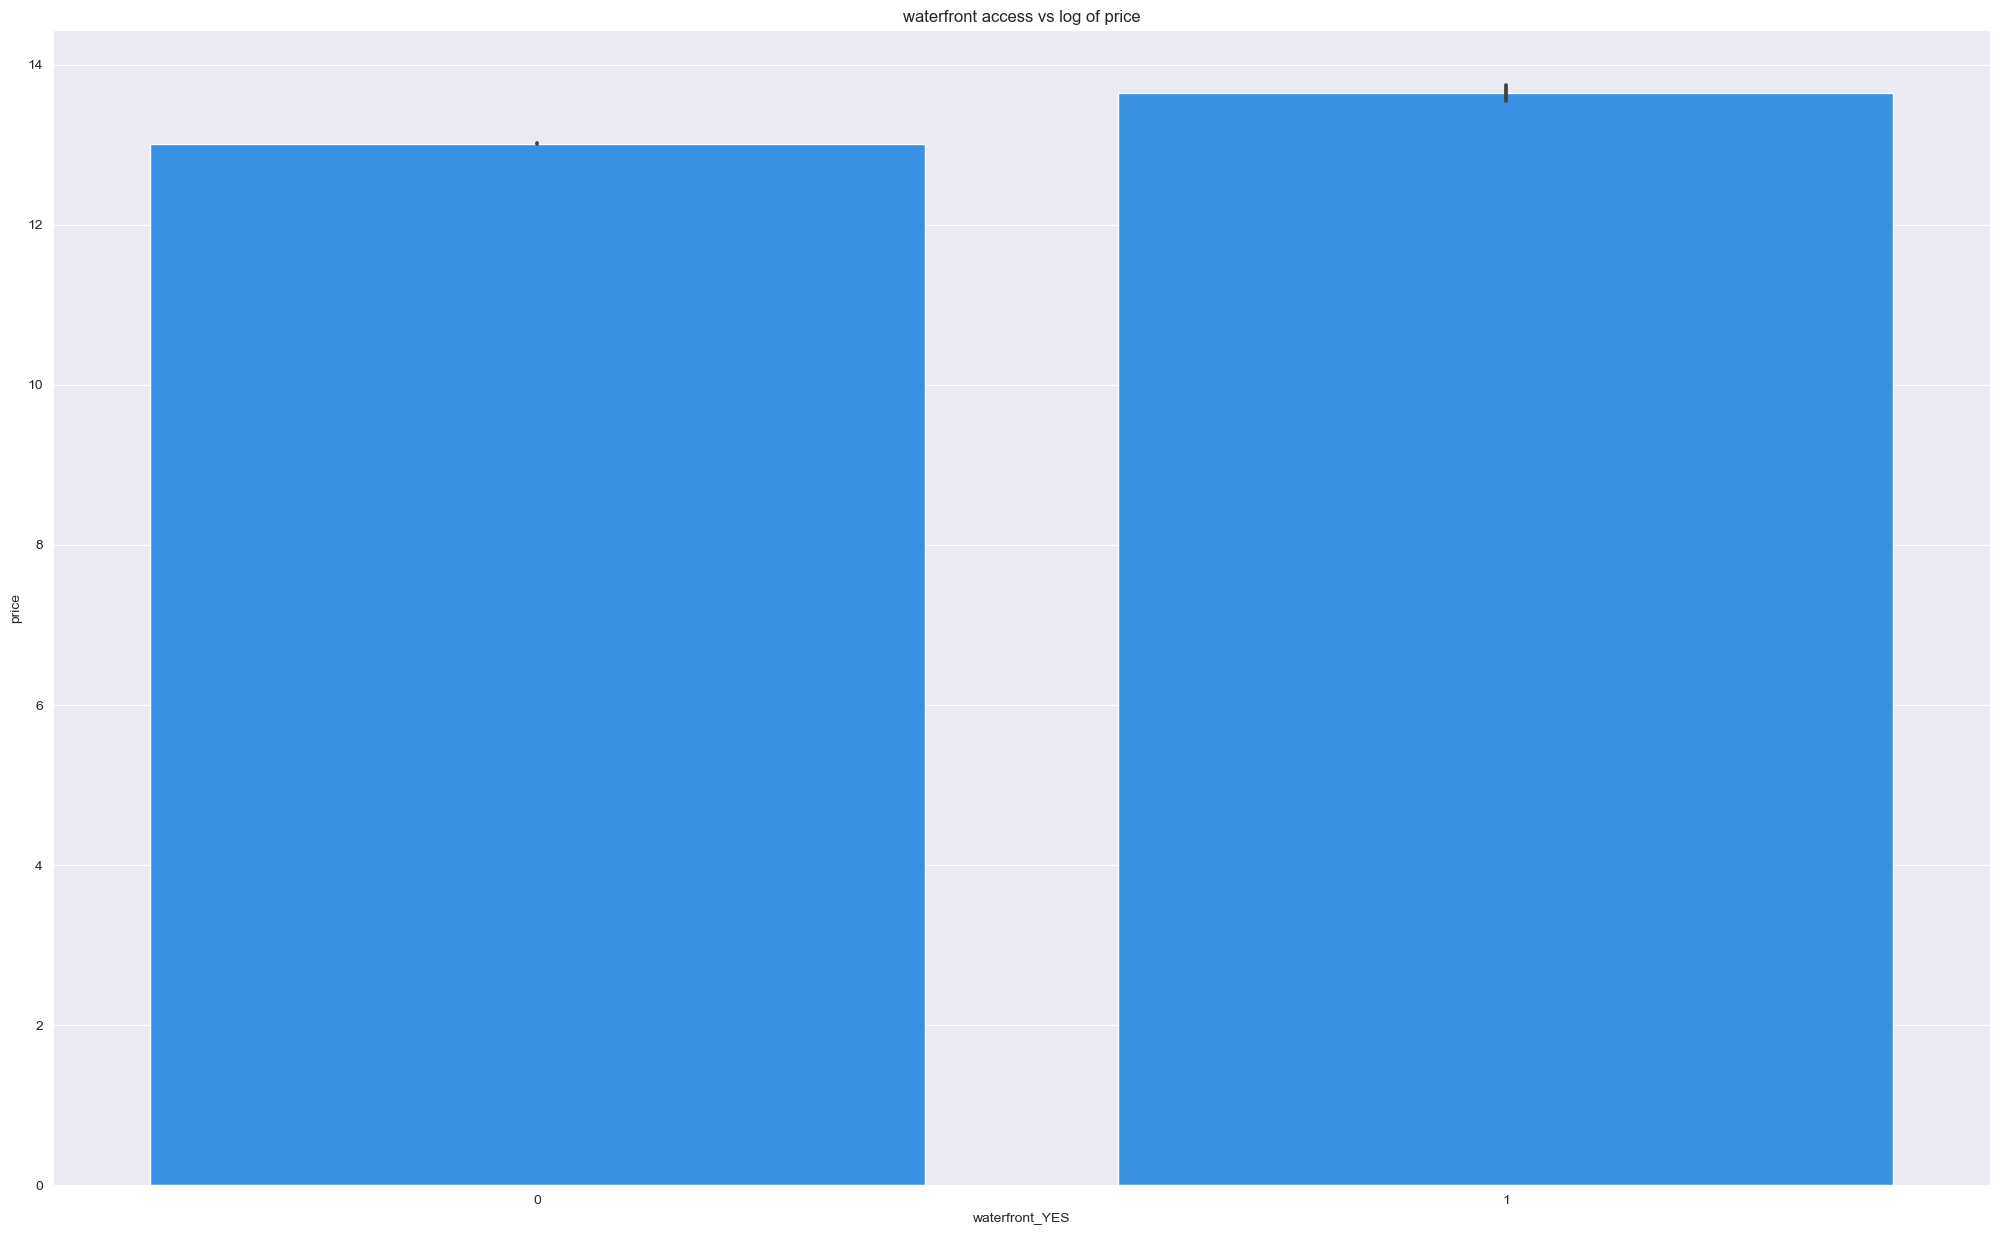

In [89]:
# visualizing the relationship between access to a waterfront and price
plt.figure(figsize=(25, 15))
ax = sns.barplot(x=df["waterfront_YES"],y=y_new,data=df , color="dodgerblue")
ax.set_title("waterfront access vs log of price");

## 6. Conclusions

- The model is statistically significant, with an R-squared value of 0.52, indicating that the independent variables in the model can explain approximately 52% of the variation in the dependent variable price.
- The sqft_living variable has a positive impact on the price of a house, with a 1 unit increase in square footage of living space resulting in a 0.02% increase in price.
- The number of bedrooms has a negative impact on the price of a house, with a 1% increase in bedrooms resulting in a 0.0803% decrease in price.
- Access to a waterfront has a positive impact on the price of a house, with an expected increase of 26.36% in price for houses with access to a waterfront compared to those without access.
- The number of floors has a negative impact on the price of a house, with a one unit increase in floors resulting in a 1.05% decrease in price.
- The variables view_GOOD and grade_12 Luxury are not statistically significant in the model, indicating that they may not have a strong impact on the price of a house.

## 7. Recommendations

- Azizi real estate agency should advise their clients that the square footage of living space is an important factor that can positively impact the price of a house.
- The agency should also inform their clients that having more bedrooms may not necessarily result in a higher price for their house.
- The agency should highlight the value of waterfront access and its positive impact on the price of a house.
- The real estate company should advise their clients that having more floors may not necessarily result in a higher price for their house.

## 8. Next Steps

 - More data should be collected and refined to improve the model's  predictive power to provide more accurate advice to the clients.
 - Removing the variables view_GOOD and grade_12 Luxury from the model, as they may not provide useful information for predicting the price of a house.